In [13]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk
from bs4 import BeautifulSoup 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
np.random.seed(seed=0)

In [2]:
data = pd.read_csv("Reviews.csv", nrows = 100000)
print('전체 리뷰 개수 :',(len(data)))


전체 리뷰 개수 : 100000


In [3]:
data = data[['Text','Summary']]
data.sample(10)


,Text,Summary
3582,"I rarely eat anything but whole wheat pasta, b...",reminds me of Italy
60498,I absolutely love 5-hour ENERGY! I use it afte...,5-hour ENERGY Highly Recommend!
53227,"this chocolate is a true treat to eat, perfect...",supreme chocolate
21333,Greenies are very muched loved as a tatsy Trea...,Excellent Teeth Cleaner
3885,I love these noodles. They are really great f...,Great and good price!
51521,These are great! As a lover of all chips I'm s...,"Delicious, just like Salt and Vinegar Chips!"
84261,Like other customers I divide these into handf...,"Great snack, great value"
10685,I recommend this instead for the same price: <...,"It's ok, but certainly not worth the cost"
59948,"The noodles were all very broken, but the tast...",Knorr's beef noodles
41032,"Despite claiming they use the ""finest ingredie...",HORRIBLE INGREDIENTS


In [4]:
print('Text 열에서 중복을 배제한 유일한 샘플의 수 :', data['Text'].nunique())
print('Summary 열에서 중복을 배제한 유일한 샘플의 수 :', data['Summary'].nunique())

Text 열에서 중복을 배제한 유일한 샘플의 수 : 88426
Summary 열에서 중복을 배제한 유일한 샘플의 수 : 72348


In [5]:
data.drop_duplicates(subset=['Text'], inplace=True)
print("전체 샘플수 :", len(data))

전체 샘플수 : 88426


In [6]:
# Null 값을 가진 샘플 제거
data.dropna(axis=0, inplace=True)
print('전체 샘플수 :',(len(data)))

전체 샘플수 : 88425


In [15]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have", "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

In [16]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
print('불용어 개수 :', len(stop_words))
print(stop_words)

[nltk_data] Downloading package stopwords to /Users/esens/nltk_data...


불용어 개수 : 179
{'be', 'because', "isn't", 'what', 'or', 'have', 'it', 'me', 'after', 'your', 'yourselves', 'over', 'most', "wasn't", 'didn', 'yours', 'had', 'which', 'wasn', 'theirs', 'shan', 'against', 'has', 'haven', 'will', 'as', 'who', 'y', 'about', "should've", 'so', 'on', 'their', 'hers', 'were', 'now', 'myself', 'an', 've', 'was', "you're", 'until', 'nor', 'herself', 'been', 'not', "that'll", 'that', 's', 'into', "don't", 'no', "needn't", 'll', 'his', 'few', 'those', "shan't", 'having', 'i', 'am', 'itself', 'while', 'how', "shouldn't", 'him', 'did', 'should', "mustn't", 'aren', 'weren', 'do', "you'll", 'below', 'more', 'she', 'again', "mightn't", 'such', 'above', 'just', 'yourself', 'its', 'to', "weren't", 'this', 'in', 'between', 'and', 'o', 'once', "wouldn't", 'when', 'themselves', 'my', 'her', 'down', "it's", 'they', 'ours', 'under', 'doing', 'if', 'off', 'of', 'during', 't', 'm', "you'd", "doesn't", 'mightn', 'whom', "won't", "she's", 'further', 'before', 'ma', 'other', 'he', 

[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
# 전처리 함수
def preprocess_sentence(sentence, remove_stopwords = True):
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열  제거 Ex) my husband (and myself) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","",sentence) # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah

    # 불용어 제거 (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stop_words if len(word) > 1)
    # 불용어 미제거 (Summary)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens

In [18]:
temp_text = 'Everything I bought was great, infact I ordered twice and the third ordered was<br />for my mother and father.'
temp_summary = 'Great way to start (or finish) the day!!!'
print(preprocess_sentence(temp_text))
print(preprocess_sentence(temp_summary, 0))

everything bought great infact ordered twice third ordered wasfor mother father
great way to start the day


In [19]:
# Text 열 전처리
clean_text = []
for s in data['Text']:
    clean_text.append(preprocess_sentence(s))
clean_text[:5]

['bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better',
 'product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo',
 'confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story lewis lion witch wardrobe treat seduces edmund selling brother sisters witch',
 'looking secret ingredient robitussin believe found got addition root beer extract ordered made cherry soda flavor medicinal',
 'great taffy great price wide assortment yummy taffy delivery quick taffy lover deal']

In [20]:
# Summary 열 전처리
clean_summary = []
for s in data['Summary']:
    clean_summary.append(preprocess_sentence(s, 0))
clean_summary[:5]


/Users/esens/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/bs4/__init__.py:282: UserWarning: "http://www.amazon.com/gp/product/b007i7yygy/ref=cm_cr_rev_prod_title" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


['good quality dog food',
 'not as advertised',
 'delight says it all',
 'cough medicine',
 'great taffy']

In [21]:
data['Text'] = clean_text
data['Summary'] = clean_summary

In [22]:
# 길이가 공백인 샘플은 NULL 값으로 변환
data.replace('', np.nan, inplace=True)
print(data.isnull().sum())

Text        0
Summary    70
dtype: int64


In [23]:
data.dropna(axis = 0, inplace = True)
print('전체 샘플수 :',(len(data)))

전체 샘플수 : 88355


텍스트의 최소 길이 : 2
텍스트의 최대 길이 : 1235
텍스트의 평균 길이 : 38.792428272310566
요약의 최소 길이 : 1
요약의 최대 길이 : 28
요약의 평균 길이 : 4.010729443721352


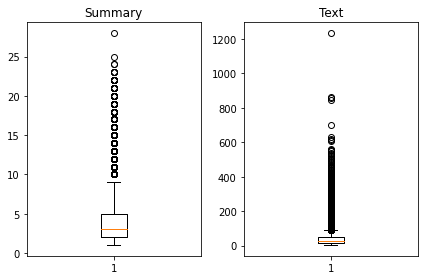

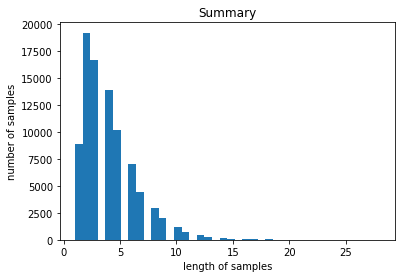

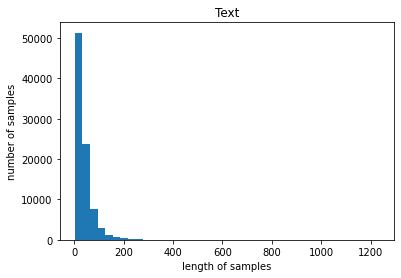

In [24]:
# 길이 분포 출력
text_len = [len(s.split()) for s in data['Text']]
summary_len = [len(s.split()) for s in data['Summary']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(summary_len)))
print('요약의 최대 길이 : {}'.format(np.max(summary_len)))
print('요약의 평균 길이 : {}'.format(np.mean(summary_len)))

plt.subplot(1,2,1)
plt.boxplot(summary_len)
plt.title('Summary')
plt.subplot(1,2,2)
plt.boxplot(text_len)
plt.title('Text')
plt.tight_layout()
plt.show()

plt.title('Summary')
plt.hist(summary_len, bins=40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('Text')
plt.hist(text_len, bins=40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [25]:
text_max_len = 50
summary_max_len = 8

In [26]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))

In [27]:
below_threshold_len(text_max_len, data['Text'])


전체 샘플 중 길이가 50 이하인 샘플의 비율: 0.7745119121724859


In [28]:
below_threshold_len(summary_max_len, data['Summary'])


전체 샘플 중 길이가 8 이하인 샘플의 비율: 0.9424593967517402


In [29]:
data = data[data['Text'].apply(lambda x: len(x.split()) <= text_max_len)]
data = data[data['Summary'].apply(lambda x: len(x.split()) <= summary_max_len)]
print('전체 샘플수 :',(len(data)))

전체 샘플수 : 65818


In [30]:
# 요약 데이터에는 시작 토큰과 종료 토큰을 추가한다.
data['decoder_input'] = data['Summary'].apply(lambda x : 'sostoken '+ x)
data['decoder_target'] = data['Summary'].apply(lambda x : x + ' eostoken')
data.head()

,Text,Summary,decoder_input,decoder_target
0,bought several vitality canned dog food produc...,good quality dog food,sostoken good quality dog food,good quality dog food eostoken
1,product arrived labeled jumbo salted peanuts p...,not as advertised,sostoken not as advertised,not as advertised eostoken
2,confection around centuries light pillowy citr...,delight says it all,sostoken delight says it all,delight says it all eostoken
3,looking secret ingredient robitussin believe f...,cough medicine,sostoken cough medicine,cough medicine eostoken
4,great taffy great price wide assortment yummy ...,great taffy,sostoken great taffy,great taffy eostoken


In [31]:
encoder_input = np.array(data['Text'])
decoder_input = np.array(data['decoder_input'])
decoder_target = np.array(data['decoder_target'])

In [32]:
#분리

indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[29546 43316 24839 ... 45891 42613 43567]


In [33]:
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

In [34]:
n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수 :',n_of_val)

테스트 데이터의 수 : 13163


In [35]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]
print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :',len(decoder_input_train))
print('테스트 데이터의 개수 :',len(encoder_input_test))
print('테스트 레이블의 개수 :',len(decoder_input_test))

훈련 데이터의 개수 : 52655
훈련 레이블의 개수 : 52655
테스트 데이터의 개수 : 13163
테스트 레이블의 개수 : 13163


In [36]:
src_tokenizer = Tokenizer()
src_tokenizer.fit_on_texts(encoder_input_train)

In [37]:
threshold = 7
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 32031
등장 빈도가 6번 이하인 희귀 단어의 수: 23779
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 8252
단어 집합에서 희귀 단어의 비율: 74.23745746308263
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.393443023084609


In [38]:
src_vocab = 8000
src_tokenizer = Tokenizer(num_words = src_vocab) 
src_tokenizer.fit_on_texts(encoder_input_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

In [39]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)

In [40]:
threshold = 6
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 10510
등장 빈도가 5번 이하인 희귀 단어의 수: 8128
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 2382
단어 집합에서 희귀 단어의 비율: 77.33587059942911
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 5.896286343062141


In [41]:
tar_vocab = 2000
tar_tokenizer = Tokenizer(num_words = tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

In [42]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

In [43]:
#빈 샘플 제거

drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

In [44]:
print('삭제할 훈련 데이터의 개수 :',len(drop_train))
print('삭제할 테스트 데이터의 개수 :',len(drop_test))

삭제할 훈련 데이터의 개수 : 1235
삭제할 테스트 데이터의 개수 : 337


In [45]:
encoder_input_train = np.delete(encoder_input_train, drop_train, axis=0)
decoder_input_train = np.delete(decoder_input_train, drop_train, axis=0)
decoder_target_train = np.delete(decoder_target_train, drop_train, axis=0)

encoder_input_test = np.delete(encoder_input_test, drop_test, axis=0)
decoder_input_test = np.delete(decoder_input_test, drop_test, axis=0)
decoder_target_test = np.delete(decoder_target_test, drop_test, axis=0)

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :',len(decoder_input_train))
print('테스트 데이터의 개수 :',len(encoder_input_test))
print('테스트 레이블의 개수 :',len(decoder_input_test))

훈련 데이터의 개수 : 51420
훈련 레이블의 개수 : 51420
테스트 데이터의 개수 : 12826
테스트 레이블의 개수 : 12826


In [46]:
#패딩
encoder_input_train = pad_sequences(encoder_input_train, maxlen = text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen = text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen = summary_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen = summary_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen = summary_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen = summary_max_len, padding='post')

In [47]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [48]:
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

In [49]:
# 디코더
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
decoder_lstm = LSTM(hidden_size, return_sequences = True, return_state = True, dropout = 0.4, recurrent_dropout=0.2)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state = [state_h, state_c])


In [50]:
# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation = 'softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 128)      1024000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 50, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

In [51]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/thushv89/attention_keras/master/src/layers/attention.py", filename="attention.py")
from attention import AttentionLayer

In [52]:
# 어텐션 층(어텐션 함수)
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis = -1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 128)      1024000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 50, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
____________________________________________________________________________________________

In [53]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')


In [54]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 2)
history = model.fit(x = [encoder_input_train, decoder_input_train], y = decoder_target_train, \
          validation_data = ([encoder_input_test, decoder_input_test], decoder_target_test),
          batch_size = 256, callbacks=[es], epochs = 50)

Epoch 1/50
201/201 [==============================] - 417s 2s/step - loss: 2.6961 - val_loss: 2.4428
Epoch 2/50
201/201 [==============================] - 402s 2s/step - loss: 2.3886 - val_loss: 2.3162
Epoch 3/50
201/201 [==============================] - 400s 2s/step - loss: 2.2498 - val_loss: 2.1685
Epoch 4/50
201/201 [==============================] - 1248s 6s/step - loss: 2.1234 - val_loss: 2.0775
Epoch 5/50
201/201 [==============================] - 426s 2s/step - loss: 2.0378 - val_loss: 2.0257
Epoch 6/50
201/201 [==============================] - 433s 2s/step - loss: 1.9741 - val_loss: 1.9851
Epoch 7/50
201/201 [==============================] - 444s 2s/step - loss: 1.9208 - val_loss: 1.9519
Epoch 8/50
201/201 [==============================] - 445s 2s/step - loss: 1.8737 - val_loss: 1.9386
Epoch 9/50
201/201 [==============================] - 452s 2s/step - loss: 1.8337 - val_loss: 1.9092
Epoch 10/50
201/201 [==============================] - 437s 2s/step - loss: 1.7970 - val_l

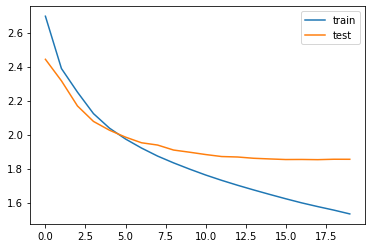

In [55]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [56]:
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음


In [57]:
# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

In [58]:
# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)
# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

In [59]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [60]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if(sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (summary_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence

In [61]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if(i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    temp=''
    for i in input_seq:
        if((i!=0 and i!=tar_word_to_index['sostoken']) and i!=tar_word_to_index['eostoken']):
            temp = temp + tar_index_to_word[i] + ' '
    return temp


In [62]:
for i in range(500, 1000):
    print("원문 : ",seq2text(encoder_input_test[i]))
    print("실제 요약문 :",seq2summary(decoder_input_test[i]))
    print("예측 요약문 :",decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")


원문 :  disappointing purchase two packages opened noodles fell apart many tiny pieces water bought noodles never happen guessing damage shipping 
실제 요약문 : in the water 
예측 요약문 :  contains


원문 :  product along lines hamburger helper remember eating kid wanted try product liquid gold orzo pasta nice treat broccoli joke small little freeze dried broccoli cheese sauce strong smell mixed rest ingredients lost taste loved overall okay nothing special better making scratch 
실제 요약문 : kraft chicken and broccoli dinner kit 
예측 요약문 :  not for me


원문 :  tried many kinds coffee keep coming back newman love ordering amazon coffee right door cannot beat 
실제 요약문 : best coffee in 
예측 요약문 :  great coffee


원문 :  healthy tasty portable packets great go perfect gym bag cannot around fresh next best option pear mango flavor texture smooth applesauce recently packed work trip good way add little something healthy hotel fast food often dominate comes business travel 
실제 요약문 : great snack for adults 
예측 요약문 

예측 요약문 :  great snack


원문 :  first bought heb liked alot bought amazon larger size less best olive oil used thanks amazon 
실제 요약문 : really good tasting 
예측 요약문 :  great product


원문 :  yo toddler picky eater however loves apple pear dry fruits eat bags snack 
실제 요약문 : my toddler loves it 
예측 요약문 :  my kids love these


원문 :  yr old english usually bully sticks pet store visit found bones try fabulous awful smell keeps focused hours different layers bone keep interested read another review dog threw bone dogs sensitive skin stomachs never issue expensive bones well worth quality staying power 
실제 요약문 : excellent for chewers 
예측 요약문 :  my dogs love these


원문 :  highland sugarworks organic maple syrup far best maple syrup daughter tasted tried many brands including maple syrup produced individuals syrup best opportunity purchase months ago amazon com unfortunately price gone like everything else grocery related good hesitate try brands want disappointed buying near future 
실제 요약문 : mapl

예측 요약문 :  great


원문 :  pro stuff fantastic salty buttery tastes like movie theater popcorn complain pop kernals thrown kettle others pop always fills tray comes popper way love 
실제 요약문 : tastes great 
예측 요약문 :  not that great


원문 :  people experience level greater others ginger takes away almost immediately like wonder drug without filling body drugs amazing 
실제 요약문 : ginger 
예측 요약문 :  great product


원문 :  members family celiac disease everyone really enjoys mix easy make pleasantly surprised flavor texture typical pizza crust add herbs give great flavor made pizza mix crust nice crisp outside little chewy inside tried really horrible gluten free pizza crusts give discovered one kids actually fight last piece pizza make 
실제 요약문 : really great gluten free option 
예측 요약문 :  great gluten free alternative


원문 :  awesome convenient product kids actually like better real taco filling much quicker make hamburger lower fat obviously stores much longer vegetarian try limit meat intake alway

예측 요약문 :  great coffee


원문 :  product deserves stars amazon packaging deserves stars amazon ships sturdy books protective packaging delicate biscuits instead getting box six biscuits got box crumbs wish one biscuit even half intact complete waste money complete disappointment buy amazon 
실제 요약문 : do not buy from amazon 
예측 요약문 :  great product but


원문 :  getting hard find discs limited types coffee like gevalia better maxwell house gevalia bitter 
실제 요약문 : best decaf 
예측 요약문 :  great coffee


원문 :  dogs loved easy break smaller pieces complaints price amazon seemed reasonable compared costs pet stores 
실제 요약문 : two paws up 
예측 요약문 :  great product


원문 :  kid taste like pasta however go extremely well vegetable stir fry practically negative calories apparently good 
실제 요약문 : good 
예측 요약문 :  not as good as the original


원문 :  sorry pass taste test always liked haribo brand gummies brand cut peach flavor gummies wrong type addition sour enough wish company send citric acid add gummies

예측 요약문 :  best coffee ever


원문 :  first ordered try purchasing recipes using sounded something different ordered amazon cannot find area sweet rice cooking wine lot limit ordering amazon ever since love cook love product 
실제 요약문 : wonderful 
예측 요약문 :  best ever


원문 :  ordering dip mix many years dip mix spicy vegetable dip desert top dips purchased 
실제 요약문 : one great dip 
예측 요약문 :  best ever


원문 :  never tried himalayan salt really like think strong normal white table salt tastier continue buy 
실제 요약문 : good salt 
예측 요약문 :  great salt


원문 :  hard find tomato powder reasonably priced little tomato paste sauce requires cook somehow store extra unused portion 
실제 요약문 : at last priced powder 
예측 요약문 :  great product


원문 :  product makes coffee making quick easy put coffee packs pot need filters measuring unfortunately many supermarkets stopped carrying 
실제 요약문 : maxwell house decaffeinated filter packs 
예측 요약문 :  great product


원문 :  size consistency grind really quite good level sa

예측 요약문 :  great product


원문 :  good ingredients pet fillers shepherd love natural balance food highly recommended food 
실제 요약문 : top quality food 
예측 요약문 :  great food


원문 :  get stuff wished sold local stores ordered one day seems like got next 
실제 요약문 : pudding mix 
예측 요약문 :  great product


원문 :  ordered product another item barry farm thru amazon ordered product stated item stock two weeks emailed asking status order emails never answered cancelled order thru amazon never received info barry farm order shipped appears stock understand buyer never barry farm 
실제 요약문 : stay away from 
예측 요약문 :  disappointed


원문 :  cannot beat convenience tea strong enough get double volume one keurig cup 
실제 요약문 : favorite tea available for my keurig 
예측 요약문 :  great tea


원문 :  limited selection decaffeinated coffees espresso machines lavazza good non decaf selection lavazza best decaf espresso able find wife likes late make friend liked americano 
실제 요약문 : good espresso coffee 
예측 요약문 :  great d

예측 요약문 :  delicious


원문 :  good veggie supplement dogs love helps one fussy puppy eat main meal would buy recommend item 
실제 요약문 : helps dogs get there veggies 
예측 요약문 :  great food


원문 :  twizzlers much better individually wrapped product hits nail head ships fast stores great anywhere house really nice get craving red rope like candy 
실제 요약문 : is the best 
예측 요약문 :  great product


원문 :  bigelow winner strong overpowering mint taste black tea strong bitter unsure want buy bulk yet strongly suggest grabbing box grocery store 
실제 요약문 : extremely delicious 
예측 요약문 :  great tea


원문 :  know know real restaurants upon cannot even get least around live consider like cheap condiment real steak sauce like got tad zing goes much meat add heat want stir want say sauce way want quantity size bottles way go compares supermarket prices given tax shipping 
실제 요약문 : heinz still great 
예측 요약문 :  the best


원문 :  ginger ale made ginger idea except made celery quite ginger ale quite sprite something

예측 요약문 :  cat food


원문 :  asian used white jasmine rice brown rice healthier alternative tried product tastes different jasmine rice fills quick another thing like product ready minutes good tasting unlike brown rice tastes like uncooked oatmeal 
실제 요약문 : yummy 
예측 요약문 :  great rice


원문 :  highly recommend first bonsai tree need kit 
실제 요약문 : bonsai kit 
예측 요약문 :  great product


원문 :  lady grey favorite tea bit leery decaf version would hold great glad able find delicious tea drink night twinings lady grey decaf tea tea bags count boxes 
실제 요약문 : no decaf aftertaste 
예측 요약문 :  great tea


원문 :  far best granola bar tried kashi bar chewy really taste fruit nuts grams fiber grams protein whole grains feel like eating something good sugar grams find sweet 
실제 요약문 : best granola bars from kashi 
예측 요약문 :  great tasting protein bar


원문 :  find true lemon extremely convenient however packet indicates natural would like assured additional ingredients safe 
실제 요약문 : convenient but 
예측 요약문 

예측 요약문 :  great chips


원문 :  yum convenience expect cup flavor real hot chocolate kids love 
실제 요약문 : easy and kids love it 
예측 요약문 :  great


원문 :  received package days good gladly opened one pack found smelled tasted like outdated also realized item returnable double disappointment last time buying product 
실제 요약문 : smell and taste 
예측 요약문 :  not as advertised


원문 :  family gluten intolerant searched suitable replacement pamela products makes good bread mix tastes good pleasant texture freshly baked complaint crumbles easily days old 
실제 요약문 : good bread mix 
예측 요약문 :  great gluten free bread


원문 :  quite expected coffee strong like even used bags could tell difference low acid make want go best ever could understand acid coffee brothers cup morning mama keeping regular brand 
실제 요약문 : not what expected 
예측 요약문 :  the best coffee


원문 :  son little foodie months refused eat anything home made food lately started become different meals worried making son balanced meals insert happ

예측 요약문 :  great for training


원문 :  enjoy lipton tea try new flavor tea honey blackberry pomegranate one best flavors tasted nicely perfect blend hot days coming soon instead drinking pop makes thirsty take lipton go packet quench leave fully satisfied 
실제 요약문 : looking for something new 
예측 요약문 :  delicious


원문 :  excellent olive oil spice ideal dipping salads pasta certainly buy 
실제 요약문 : oil 
예측 요약문 :  great product


원문 :  ordered paying pet store prices greenies dogs godsend larger container affordable price would ever get anywhere else 
실제 요약문 : great value happy dogs 
예측 요약문 :  great product


원문 :  used candy bar every one loved taste great thank hope get soon 
실제 요약문 : love it 
예측 요약문 :  delicious


원문 :  sure quality placed order since reviewers said prune hard dry first tried pleasantly since soft moist sweet buy running 
실제 요약문 : very good 
예측 요약문 :  great taste


원문 :  dog hates every food dogs treat ever found never refuses treats bit pricey go waste limit number eats d

예측 요약문 :  great product


원문 :  great product fair price russian caviar every day use snacks like home smoked salmon cream cheese red onions perfect wash sparkling wine party 
실제 요약문 : great product at very fair price 
예측 요약문 :  great product


원문 :  usually never write review feel time packaging poor coconut water color dark almost black crazy selling food products get away 
실제 요약문 : dont buy from amazon go to local store 
예측 요약문 :  not what expected


원문 :  buying local store great product 
실제 요약문 : is this really from box 
예측 요약문 :  great


원문 :  favorite flavor kind bars since much fruit carbs lower looking extremely crunchy chewy great flavor definitely holds meals good stuff 
실제 요약문 : good and good for you 
예측 요약문 :  great tasting snack


원문 :  tea looks great made disappointment worse tasted almost aroma tea weak pretty tasteless reason bought wife really loved dilmah earl grey loose leaf decided try dilmah one disappointed us would given stars sold premium price taken price val

예측 요약문 :  great product


원문 :  like chew gum cannot chew long without getting symptoms new gums flavors last well beyond tolerance gum harder chew somehow get symptoms like way makes teeth feel like polished buy bulk leave car 
실제 요약문 : nice tooth cleaner 
예측 요약문 :  love this gum


원문 :  bought product love fruits pears taste awful dry without flavor 
실제 요약문 : awful 
예측 요약문 :  horrible


원문 :  product expected delivered indicated would definitely buy amazon price competitive 
실제 요약문 : greenies review 
예측 요약문 :  good but


원문 :  great deal much bottles big value unbeatable shipped quickly delicious perfect bloody smoothies 
실제 요약문 : so much 
예측 요약문 :  great buy


원문 :  expecting much price good sugar chocolate fix actually quite tasty decent ingredients 
실제 요약문 : much better than expected good price 
예측 요약문 :  not too spicy


원문 :  bought cats picked ear product worked well clearing ear think directions mention use clean cat ears thoroughly get used product recommended twice day doses 

예측 요약문 :  not the best


원문 :  going first six pack purchased amazon added two country quick oats raisins walnuts almonds half glass soy milk bowl cooked microwave three reduced power added honey touch soy milk consistency easiest breakfast make taste texture good amazon offers active subscription rates 
실제 요약문 : country choice oats is great choice 
예측 요약문 :  great taste and texture


원문 :  receiving product amazon year amazon cannot around taste good flaxseed pumpkin seeds helped raise good 
실제 요약문 : granola plus flax and pumpkin seeds 
예측 요약문 :  very good


원문 :  sweet tasty sugar baby love better gerber like brand 
실제 요약문 : baby food 
예측 요약문 :  great taste


원문 :  price paid starbucks french roast pound bag less paid local grocery store ounce bag love deep flavor coffee purchase form vendor 
실제 요약문 : great coffee best price 
예측 요약문 :  great coffee


원문 :  cats royal canin adult one dry fur switched intense beauty nine months ago really given thick soft coat vet even commented soft f